# [Computational Social Science] Project 4: Unsupervised Learning

**Enter your Name:**Nalina Sofia Theagarajan

*Semester:* Fall 2024

## Data Description and Preprocessing

For this project, you will explore data from the [National Health and Nutrition Examination Survey](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey?select=questionnaire.csv). NHANES is a unique study that combines survey methodology with in-person medical examinations to create a dataset with demographic information, health indicators, and health outcomes.

We start by importing the data and doing some preliminary preprocessing for you. We import some libraries that will be helpful as well. 'SEQN' is the ID number for each respondent, and 'HSD010' will be our target outcome. [HSD010](https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/HSQ_H.htm#HSD010) asks for the respondent's self reported health condition, which can range from "excellent" to "poor."

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split

In [2]:
# Load nhanes data
nhanes = pd.read_csv('nhanes.csv')
# Get the ID numbers for each observation (seqn)
seqn = nhanes['SEQN']
# Get the target, "self-reported health condition," HSD010
hsd010 = nhanes['HSD010']
# Drop SEQN from the dataframe and then apply the standard scaler
nhanes = nhanes.drop(['SEQN', 'HSD010'], axis = 1)
nhanes_scaled = pd.DataFrame(StandardScaler().fit_transform(nhanes),
                             columns = nhanes.columns)
# Add the ID and target back in
nhanes_scaled['SEQN'] = seqn
nhanes_scaled['HSD010'] = hsd010
nhanes_scaled = nhanes_scaled.set_index('SEQN')
nhanes_scaled.head()

,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,HSD010
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440,1
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812,1
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812,2
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440,2
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,-2.605509,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812,3


## Plots

Let's take a look at the data. Below we visualize boxplots of family income to federal poverty line ratio ('INDFMPIR') and self-reported health condition. Notice how there are some clear patterns (the lower the ratio, the lower reported health condition), but it's not a perfect separation. We have 240+ features in our dataset, and we likely have several features in our dataset that highly correlate with our family income-poverty line ratio measure - PCA will help us simplify these.

C:\Users\Nalina Sofia\AppData\Local\Temp\ipykernel_24708\1067345979.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'HSD010', y = 'INDFMPIR', palette = "tab10", data = nhanes_scaled)


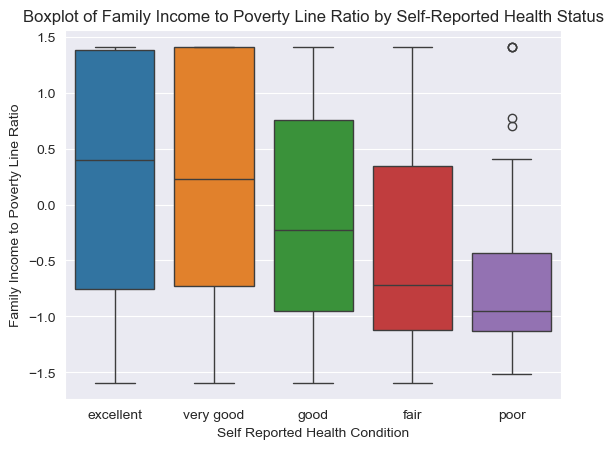

In [3]:
# Create a binary version of hsd010 where 1-3 are "good" and 4-5 are "poor"
nhanes_scaled['HSD010_binary'] = hsd010_binary = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['good', 'good', 'good', 'poor', 'poor']) 
# Recode the original hsd010 with the string labels
nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['excellent', 'very good', 'good', 'fair', 'poor'])
# Boxplot of hsd010
ax = sns.boxplot(x = 'HSD010', y = 'INDFMPIR', palette = "tab10", data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Self-Reported Health Status")
plt.show()

C:\Users\Nalina Sofia\AppData\Local\Temp\ipykernel_24708\2374058903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'HSD010_binary', y = 'INDFMPIR', palette = "tab10", data = nhanes_scaled)


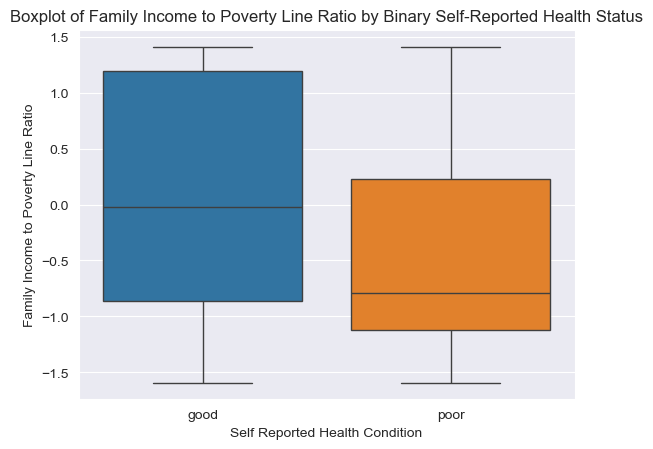

In [4]:
# Boxplot of hsd010_binary
ax = sns.boxplot(x = 'HSD010_binary', y = 'INDFMPIR', palette = "tab10", data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Binary Self-Reported Health Status")
plt.show()

Family income also is not necessarily well correlated with measured health outcomes. See below where we look at the relationship between Body Mass Index (BMI) and the family income-poverty line ratio, and shade points by self-reported health condition. It's hard to find a clear pattern - this is where clustering may come in handy. 

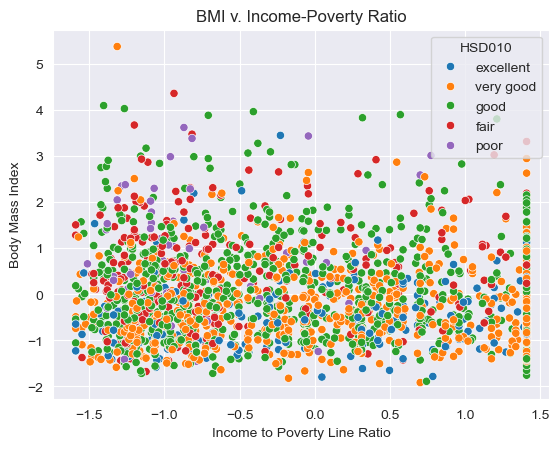

In [5]:
ax = sns.scatterplot(x = "INDFMPIR", y = "BMXBMI", hue = "HSD010", palette = "tab10", data = nhanes_scaled)
ax.set(xlabel = "Income to Poverty Line Ratio",
      ylabel = "Body Mass Index")
ax.set_title("BMI v. Income-Poverty Ratio")
plt.show()

Before we move to working on unsupervised methods, we'll drop our target variables again:

In [6]:
nhanes_scaled_original=nhanes_scaled.copy()
nhanes_scaled = nhanes_scaled.drop(['HSD010', 'HSD010_binary'], axis = 1)

## Principal Component Analysis

Conduct a Principal Component Analysis (PCA) of the nhanes data. The data has already been prepared for you, so you can work directly on nhanes_scaled. Be sure to do the following:

- Choose the number of components and provide 1-2 sentences about your choice of the number of components. 
- Plot a barplot of the variation explained by each component. *Hint*: look at the attributes associated with your model. 
- Choose how many components you will use to fit a supervised learning model and provide 1-2 sentences to explain that choice.
- Plot a 2D scatterplot of the first two components and provide 1-2 sentences analyzing the plot.

### Train PCA and Discuss Number of Components

In [7]:
# Train PCA model
pca = PCA()
pca_fit = pca.fit(nhanes_scaled)


### Barplot of Components

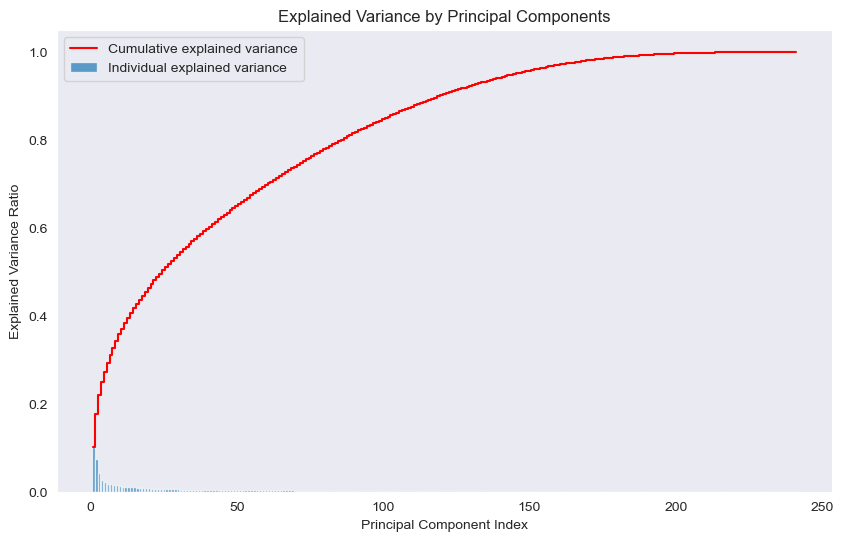

In [8]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()



### How many components will you use to fit a supervised learning model?

In [9]:
# Determine optimal number of components
threshold = 0.90  # Set a threshold for cumulative explained variance (90% in this case)
optimal_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal number of components to explain {threshold*100}% variance: {optimal_components}")

# Train PCA with optimal components
pca_optimal = PCA(n_components=optimal_components)
pca_optimal_fit = pca_optimal.fit_transform(nhanes_scaled)

# Output PCA components and transformed data shape
print("PCA Components:")
print(pca_optimal.components_)
print("Transformed Data Shape:")
print(pca_optimal_fit.shape)

Optimal number of components to explain 90.0% variance: 120
PCA Components:
[[ 1.11022302e-16 -6.42548524e-04 -0.00000000e+00 ... -5.18527860e-03
  -1.59294643e-02  5.24044964e-03]
 [-1.38777878e-17 -6.04842358e-03 -2.77555756e-17 ...  2.56209449e-02
   3.65166942e-02  7.84638249e-02]
 [-1.78676518e-16 -3.97199255e-03  0.00000000e+00 ... -1.54499712e-03
   3.19426795e-02 -1.35728746e-01]
 ...
 [ 2.67583292e-18 -3.15791493e-03 -1.03035205e-17 ... -1.34861530e-02
  -7.93831135e-02 -5.93329217e-03]
 [-8.38249894e-17  8.42702204e-02  1.09566253e-16 ...  3.80114626e-02
  -3.34645539e-02 -7.11291800e-03]
 [-1.86547827e-17  8.04440505e-03  1.00372769e-16 ...  1.76289629e-03
   4.17881849e-02  1.97913746e-02]]
Transformed Data Shape:
(2064, 120)


**Discussion on the Number of Components**
Choosing Components: The barplot shows the explained variance by each principal component and the cumulative variance curve.  The barplot and cumulative variance step line help visualize the variance explained by each component.  We have used a threshold of 90% cumulative explained variance to decide on the optimal number of components. This balances dimensionality reduction with information retention. The blue bars represent the proportion of variance explained by each individual component.  The red line indicates the cumulative variance, helping identify the number of components required to reach a specific threshold (e.g., 90%).  The optimal number of components to explain 90% varaiance is 120 as seen above.

Retaining too few components might miss important variance in the dataset.  Retaining too many components could retain noise or redundant features, defeating the purpose of PCA. Here the optimum components are 120.

### 2D Scatterplot of the first two components

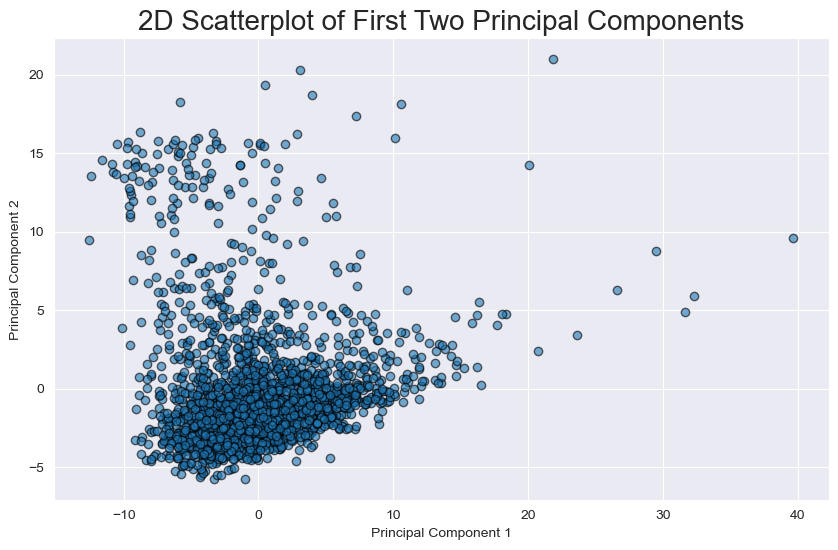

In [10]:
# Perform PCA and transform data to 2 components
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(nhanes_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])

# Scatterplot of the first two components
plt.figure(figsize=(10, 6))
targets = ['excellent', 'very good', 'good', 'fair', 'poor']
colors = ['r', 'g', 'c', 'y', 'o']
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, edgecolor='k')
plt.title('2D Scatterplot of First Two Principal Components', fontsize=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()


***The scatterplot represents each sample in the dataset based on its projection onto the first two principal components.
Interpretation:  The scatterplot shows the distribution of samples in the reduced 2D space.  Points that are close together are similar in the high-dimensional feature space, while points far apart are dissimilar. The first two components are prominent, however, they are not representative of the data as seen from the scatterplot.***

- Choose a clustering algorithm and explain it in 1-2 sentences.
- Cluster the nhanes data. Detail any choice you need to make with regards to number of clusters, and how you arrived at that choice. For instance, you might use the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) if you choose k-means.
- Plot your clusters on top of BMI v. Income Poverty Ratio Plot. Describe what you see in 1-2 sentences.
- Retrain the clustering algorithm, but this time use your PCA results instead of the original dataframe. Plot the clusters on top of the 2D PCA scatterplot from the previous step. Describe your results in 1-2 sentences.

### Choose a Clustering Algorithm

## I chose Agglomerative Clustering for this assignment. Agglomerative clustering is a type of hierarchical clustering algorithm in machine learning that uses a bottom-up approach to group data points into clusters by starting with each data point as its own cluster and then progressively merging the closest pairs of clusters until all data points belong to a single large cluster, essentially building clusters based on their similarity to one another.  I have used the blobs model of the Agglomerative Clustering.  It is often visualized using a dendrogram to show the hierarchy of cluster merging.

### Cluster nhanes

In [11]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Find features
features = nhanes_scaled




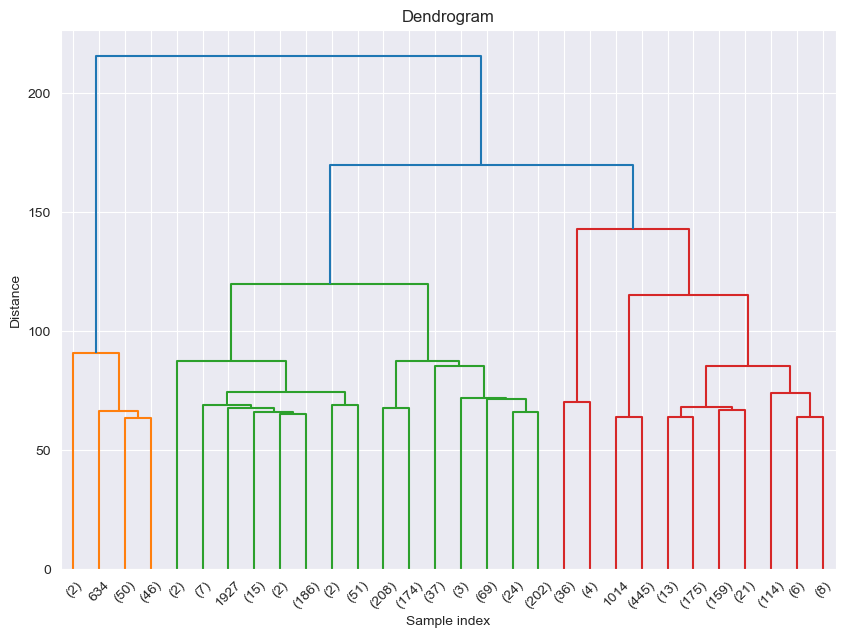

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# To find the number of optimal clusters
X = nhanes_scaled

# Compute linkage matrix
linked = linkage(X, method='ward')  # X is the feature matrix

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


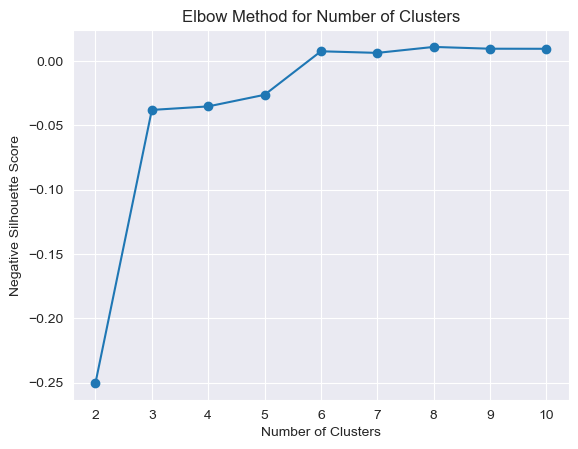

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# To find the number of optimal clusters
X = nhanes_scaled

inertia = []
for n_clusters in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)
    inertia.append(-silhouette_score(X, cluster_labels))  # Silhouette score as a proxy

# Plot the inertia
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Negative Silhouette Score')
plt.show()

***The number of clusters in Agglomerative Clustering is a hyperparameter that we define before running the algorithm. However, choosing the optimal number of clusters typically involves analyzing the data and the results of the clustering. Here we have used Dendrogram and Elbow method to arrive at the optimal number of clusters. Elbow method is typically used for K-means clustering model, however it can be used to know the optimal mumber of clusters in Agglomerative Clustering as well.  Dendrogram and Elbow Method both show the optimum at 5 and there is not much prominent difference after 5.  The above visualizations show the model reaches optimum at 5, hence we take the optimal components as 5 for our model.***

In [14]:
# Perform Agglomerative Clustering
n_clusters = 5 # Set the desired number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

ward = AgglomerativeClustering(n_clusters=5,
                               linkage='ward', #linkage can be ward (default), complete, or average
                               metric='euclidean') #affinity must be euclidean if linkage=ward

clusters = agg_clustering.fit_predict(features)

# Add cluster labels to the DataFrame
nhanes_scaled['Cluster'] = clusters


### Plot your clusters on top of the BMI v. Income Poverty Ratio Plot

In [15]:
hsd010

0       1
1       1
2       2
3       2
4       3
       ..
2059    3
2060    2
2061    4
2062    1
2063    2
Name: HSD010, Length: 2064, dtype: int64

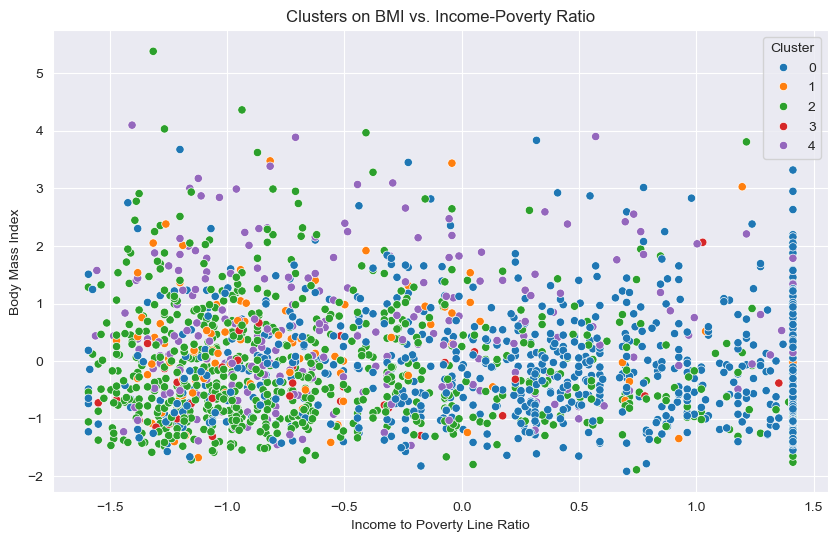

In [16]:
# Create the scatterplot with seaborn
#nhanes_scaled['HSD010'] = hsd010

#print(nhanes_scaled['HSD010'].head())

#nhanes_scaled[HSD0l0]['Cluster'] = Clusters

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x="INDFMPIR",          # Income to Poverty Line Ratio
    y="BMXBMI",            # Body Mass Index
    hue='Cluster',
    palette="tab10",       # Color palette
    data=nhanes_scaled     # Data source
)




# nhanes_scaled['HSD010'] = nhanes_scaled['HSD010']

#nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].astype(str).replace(
#    [1, 2, 3, 4, 5], ['excellent', 'very good', 'good', 'fair', 'poor'])

#nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].astype(str).replace(
#    "1", 'excellent')


# Add labels and title
ax.set(
    xlabel="Income to Poverty Line Ratio",
    ylabel="Body Mass Index",
    title="Clusters on BMI vs. Income-Poverty Ratio"
)

# Show the plot
plt.legend(title="Cluster") # Adjust title based on your hue variable
plt.grid(True)
plt.show()


###Plotting the clusters on the BMI index is very scattered.  It does not show amy pattern on visualization.

### Retrain the clustering algorithm on PCA components and plot clusters on your 2D scatter

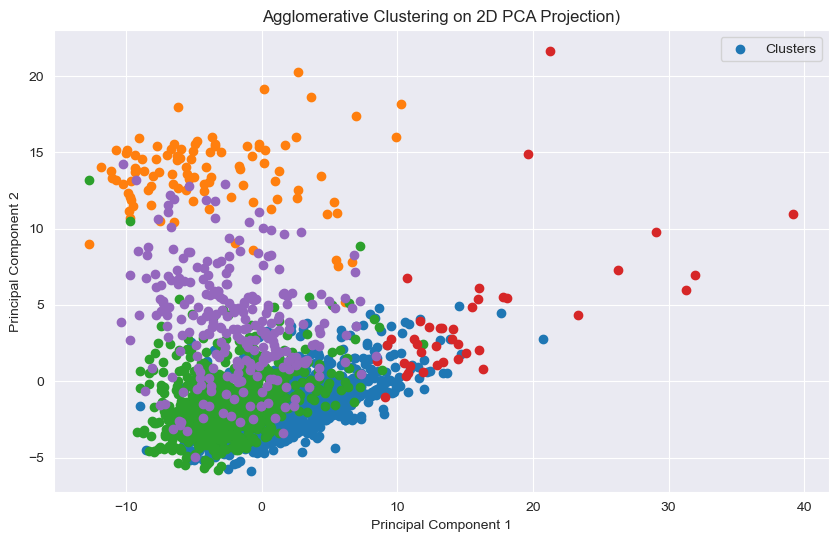

In [17]:
# Use PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(features)
pca_df = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Scatterplot of clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2']) 

plt.title('Agglomerative Clustering on 2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend({"Clusters"})
plt.grid(True)
plt.show()

## Now in the above scatterplot when the clustering algorithm on PCA is placed on top of the BMI v. Income Property Ration plot, it shows distinct pattern on visualization.  Principal Component Analysis (PCA) helps to pick the prominent features, which is making the big data condensed and the model useful to interpret. 

## Neural Network

Now we are ready to predict! Do the following:

- Choose either HSD010 or HSD010\_binary as your target outcome.  
- Train a neural network using the original features. Much of the code to train a basic neural net has been set up for you, but you will need to fill in a couple of missing pieces.
- Train a neural network using only your PCA components as features.
- Train a neural network using your PCA components and the predicted class membership from your clustering algorithm as features.
- Compare and contrast how well each algorithm did. Which featurization technique would you pick and why?

Below we provide a template for training a neural network. Use this template for training on the original features, on the PCA components, and the PCA components + the predicted classes from your clusters.

### Neural Network on Original Features

In [18]:
#import libraries
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# Keras libraries
!pip install tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [19]:
# Load nhanes data
nhanes = pd.read_csv('nhanes.csv')

# Get the target, "self-reported health condition," HSD010
hsd010 = nhanes['HSD010']

X = nhanes

y = hsd010

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 10)



In [20]:
#print("Unique values in y:", y.unique())

In [21]:
y

0       1
1       1
2       2
3       2
4       3
       ..
2059    3
2060    2
2061    4
2062    1
2063    2
Name: HSD010, Length: 2064, dtype: int64

In [22]:

X.head()

,SEQN,HSD010,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,...,OHQ033,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x
0,73568,1,1,87,2,2,12,7,1,1,...,1,2,2,1,2,1,1,2,2,2
1,73576,1,1,49,2,1,23,6,1,1,...,1,2,1,1,2,1,1,2,1,1
2,73579,2,1,59,2,2,34,1,1,1,...,1,2,1,2,1,1,2,1,1,1
3,73581,2,1,25,2,2,22,7,1,1,...,1,2,2,1,2,1,2,1,1,2
4,73584,3,1,54,2,2,20,1,1,1,...,1,1,3,2,2,1,2,1,2,1


In [23]:
#print (data.shape)

In [24]:
#Let's flatten the data into 1D array
# ----------
# Convert the data type from int to float
X_train_scaled = X_train.astype('float32')
X_test_scaled = X_test.astype('float32')

# Normalize the data by dividing the maximum value
X_train /= 243
X_test /= 243

In [25]:
# check out the training data form
y_train

604     1
1907    2
1487    4
899     1
494     3
       ..
2009    2
1180    3
1344    2
527     3
1289    4
Name: HSD010, Length: 1548, dtype: int64

In [26]:
# print out some descriptives of the training and testing datasets
print(f'The dataset contains {len(X_train)} training data samples, and {len(X_test)} test data samples')

The dataset contains 1548 training data samples, and 516 test data samples


In [27]:
#1548 set the number of classes
num_classes = 6

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 
                                     num_classes)
y_test = keras.utils.to_categorical(y_test, 
                                    num_classes)

In [28]:
# Let's look at the first label to see how it has been binarized
print(y_train[0])  

[0. 1. 0. 0. 0. 0.]


In [29]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# create neural network model
# -----------
model = Sequential()

model.add(Dense(6, input_dim=X_train.shape[1], kernel_initializer= 'normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal', activation='relu'))

## Add any additional layers you wish here

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)


Epoch 1/50


C:\Users\NalinaSofia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\NalinaSofia\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


9/9 - 1s - 140ms/step - accuracy: 0.0569 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/50
9/9 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan


C:\Users\NalinaSofia\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Epoch 3/50
9/9 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
9/9 - 0s - 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
9/9 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
9/9 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/50
9/9 - 0s - 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/50
9/9 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/50
9/9 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 10/50
9/9 - 0s - 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 11/50
9/9 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 12/50
9/9 -

In [31]:
# Evaluate the model# Train the model

history = model.fit(X_test, y_test,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=200,
                    verbose=2)


loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/50
2/2 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/50
2/2 - 0s - 29ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/50
2/2 - 0s - 25ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
2/2 - 0s - 25ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
2/2 - 0s - 25ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
2/2 - 0s - 25ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/50
2/2 - 0s - 24ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/50
2/2 - 0s - 25ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/50
2/2 - 0s - 25ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 10/5

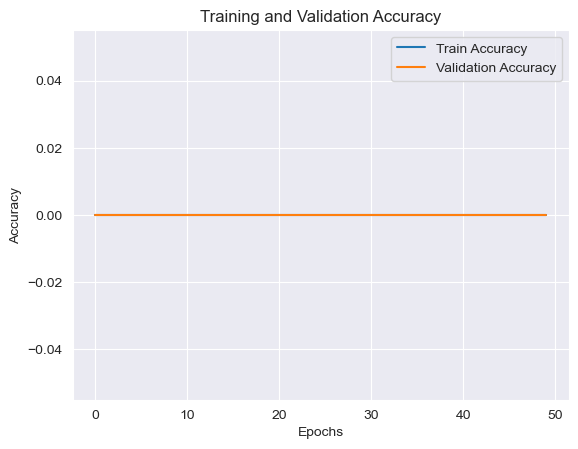

In [32]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


### Neural Network on Principal Components

Epoch 1/50


C:\Users\NalinaSofia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.0809 - loss: 1110419.8750 - val_accuracy: 0.0000e+00 - val_loss: 1078006.5000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1111792.3750 - val_accuracy: 0.0000e+00 - val_loss: 1077787.2500
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1103927.0000 - val_accuracy: 0.0000e+00 - val_loss: 1077775.5000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1101464.6250 - val_accuracy: 0.0000e+00 - val_loss: 1077820.1250
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 1087115.0000 - val_accuracy: 0.0000e+00 - val_loss: 1078001.7500
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1105595.5000 - val_accuracy: 0.0000e+00 - val_loss: 1078697.8750
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1097268.6250 - val_accuracy: 0.0000e+00 - val_loss: 1080804.1250
Epoch 

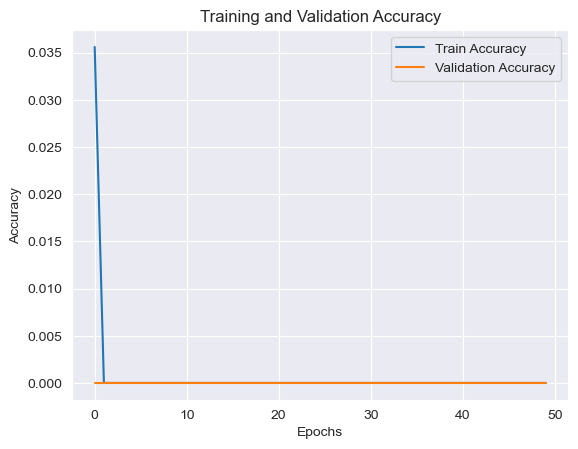

In [33]:
## Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your dataset (replace with your data path)
data = pd.read_csv('nhanes.csv')  # Replace with actual file

# Define target and features
y = data
# Replace with your target column
X = data.drop(columns=['HSD010'])  # Replace with non-feature columns

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Use the number of components from previous analysis
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(243, activation='relu', input_shape=(X_pca.shape[1],)),  # Input layer
    Dropout(0.2),
    Dense(2, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(243, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=200, 
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


### Neural Network on Principal Components + Cluster Membership

Epoch 1/50


C:\Users\NalinaSofia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\NalinaSofia\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0436 - loss: 0.0000e+00 - val_accuracy: 0.0604 - val_loss: 0.0000e+00
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0663 - loss: 0.0000e+00 - val_accuracy: 0.0604 - val_loss: 0.0000e+00
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0789 - loss: 0.0000e+00 - val_accuracy: 0.0604 - val_loss: 0.0000e+00
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0737 - loss: 0.0000e+00 - val_accuracy: 0.0634 - val_loss: 0.0000e+00
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0682 - loss: 0.0000e+00 - val_accuracy: 0.0634 - val_loss: 0.0000e+00
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0685 - loss: 0.0000e+00 - val_accuracy: 0.0695 - val_loss: 0.0000e+00
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0766 - loss: 0.0000e+00 - val_accuracy: 0.0695 - val_loss: 0.0000e+00
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0772 - loss: 0.0000e+00 

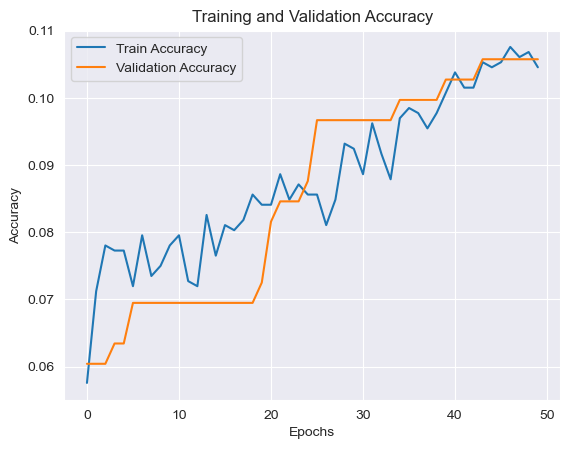

In [34]:
# Load dataset (replace with your actual data file)
data = pd.read_csv('nhanes.csv')  # Replace with your dataset path

# Define target and features
y = data['HSD010']  # Replace with your target column
X = data.drop(columns=['HSD010'])  # Replace with non-feature columns

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Adjust number of components based on previous analysis
X_pca = pca.fit_transform(X_scaled)

# Perform Agglomerative Clustering
cluster_model = AgglomerativeClustering(n_clusters=5)  # Adjust number of clusters
cluster_labels = cluster_model.fit_predict(X_scaled)

# Combine PCA components and clustering labels
X_combined = np.hstack([X_pca, cluster_labels.reshape(-1, 1)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(2, activation='relu', input_shape=(X_combined.shape[1],)),  # Input layer
    Dropout(0.2),
    Dense(2, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=200,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


## Discussion Questions

1. In your own words, what is the difference between PCA and clustering?

## Principal Component Analysis (PCA) and clustering are both unsupervised learning methods that group data, but they differ in their goals and how they represent data.  PCA groups related variables together to create a low-dimensional representation of data. PCA can be used to visualize data in two or three dimensions, and can also be used as a pre-processing step for other machine learning algorithms.  This helps in condensing the big data to useable data with important features. However, clustering groups related observations together into clusters. The goal of clustering is to minimize the difference in measurements within the same cluster, while maximizing the differences between clusters.  PCA and clustering can be used together as complementary analytical tasks. The output of a clustering method can be used in a PCA plot.

2. Did you notice any advantages to combining PCA and clustering? If so, what do you think they were? If not, why do you think you didn't see any gains from this combination?

## I notice advantage in combining PCA and clustering.  The scatterplot with PCA and clustering has improved visualization than the two separately.  This shows the improvement in the performance of the model.  PCA reduces the big data into useable data with important features and clustering groups related observations together improving the data quality.  By reducing the components to prominent components, PCA helps remove the irrelevant noise from the data, making the clusters cleaner and more distinct. On visualization of the scatterplots PCA and clustering together make better visualization in the above scatterplots showm as well. Thus the two together play a complementary role and improve the machine learning processs.  Even with the neural networks, there was improved accuracy and reduced loss when PCA and agglomerative clustering are used together.

3. How can unsupervised techniques help with downstream supervised learning tasks when working with "big data?"

## Unsupervised techniques can significantly enhance downstream supervised learning tasks in "big data" scenarios by extracting meaningful features and patterns from large unlabeled datasets, effectively pre-processing the data and creating richer representations that can be used to train more accurate supervised models specifically when labeled data is limited or difficult to acquire.  Unsupervised methods like PCA help in dimensionality reduction and help in identifying and extracting relevant features from high-dimensional data, reducing complexity and improving the performance of subsequent supervised models.  Clustering algorithms can identify outliers and anomalies in the data and helps in targeted data cleaning before using the data for supervised learning.  As we could see in the assignment, unsupervised machine learning has intialized the weights of artifical neural network with useful features, leading to faster covergance and better performance on downstream supervised learning tasks.